# Term Project
## Prediction of Sleep Quality Based on Lifestyle Factors

## Term Project Milestone 1: Data Selection and EDA

### Introduction: 
Sleep quality is a critical determinant of physical health, mental well-being, and workplace productivity. Poor sleep is associated with increased stress, reduced cognitive performance, and a higher risk of chronic disease (1-3). For companies developing wellness or fitness applications, understanding which lifestyle factors most strongly influence sleep quality can enable more personalized and effective health recommendations. This project addresses a business problem faced by a hypothetical wellness app company: predicting user sleep quality from lifestyle and behavioral data to tailor interventions that improve overall wellness.


### Project Goal 
This project addresses a business problem faced by a hypothetical wellness app company: predicting user sleep quality from lifestyle and behavioral data to tailor interventions that improve overall wellness.
The goal of this project is to build a predictive model that estimates an individual’s sleep quality score based on modifiable lifestyle factors, including physical activity, caffeine intake, screen time, stress level, and work hours. 
This analysis is valuable from a business perspective because it allows a wellness company to move beyond generic advice and toward personalized, data-driven recommendations. Instead of offering one-size-fits-all sleep tips, the company can identify high-risk users and intervene proactively, potentially improving user engagement, retention, and health outcomes. By identifying which factors are most predictive of poor sleep, the company can recommend actionable changes—such as increasing daily exercise, reducing evening screen time, or managing work-related stress—to help users improve their sleep.


### Methods
Over the course of this project, exploratory data analysis  and predictive modeling will be used to build and evaluate a solution that demonstrates how lifestyle data can be leveraged to support better sleep health.
The target variable for the model will be sleep quality, measured as a continuous score (scale 1-10) or as a categorical variable (e.g., poor, average, good). 

### Data set
The primary dataset for this project will come from Kaggle’s Sleep Health and Lifestyle Dataset (4), which includes information on sleep duration, sleep quality, physical activity, stress levels, BMI, and work-related variables. If necessary, this dataset can be supplemented with a fitness tracker dataset to enrich activity and behavioral features. The modeling task will be framed as either a regression problem (predicting a numeric sleep quality score) or a classification problem (predicting sleep quality categories).

### References
1. Zhang, Y. (2023). The Impact of Lifestyle Factors on Sleep Efficiency and Sleep Quality. Highlights in Science, Engineering and Technology, 54, 351-356. https://doi.org/10.54097/hset.v54i.9791
2. Alruwaili, N.W., Alqahtani, N., Alanazi, M.H. et al. The effect of nutrition and physical activity on sleep quality among adults: a scoping review. Sleep Science Practice 7, 8 (2023). https://doi.org/10.1186/s41606-023-00090-4
3. Chandler, M. C., Ellison, O. K., McGowan, A. L., Fenn, K. M., & Pontifex, M. B. (2024). Physical activity and sleep moderate the relationship between stress and screen time in college-aged adults. Journal of American college health : J of ACH, 72(5), 1401–1411. https://doi.org/10.1080/07448481.2022.2077110
4. Kaggle. Sleep Health and Lifestyle Dataset. https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

### Initial approach - Exploratory Data Analysis (EDA)

0. Import libraries and load data set

In [43]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading data set
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

#Inspect data structure
df.info()

#Basic Descriptive Statistics
df.describe()

#Clean column names
df.columns = (
    df.columns
    .str.strip()                 # remove leading/trailing spaces
    .str.lower()                 # convert to lowercase
    .str.replace(" ", "_")       # replace spaces with underscores
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


1. Graph 1: Sleep Quality vs Screen Time

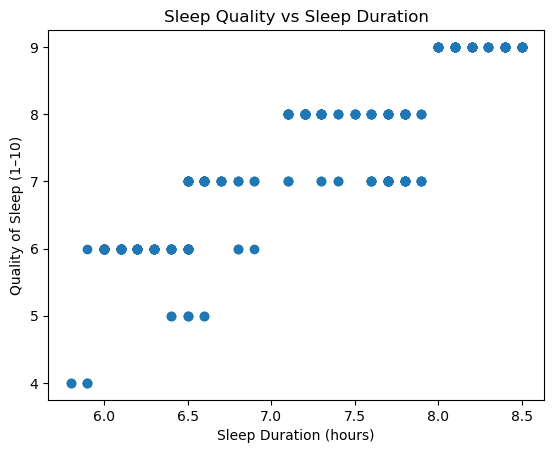

In [45]:
plt.figure()
plt.scatter(df["sleep_duration"], df["quality_of_sleep"])
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Quality of Sleep (1–10)")
plt.title("Sleep Quality vs Sleep Duration")
plt.show()

2. Graph 2 — Sleep Quality vs Physical Activity Level

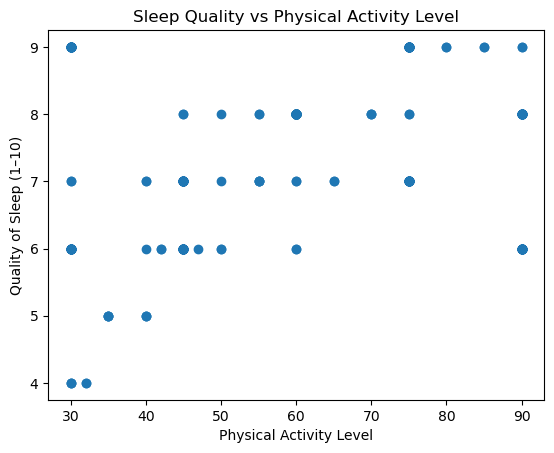

In [47]:
plt.figure()
plt.scatter(df["physical_activity_level"], df["quality_of_sleep"])
plt.xlabel("Physical Activity Level")
plt.ylabel("Quality of Sleep (1–10)")
plt.title("Sleep Quality vs Physical Activity Level")
plt.show()

3. Graph 3 — Distribution of Sleep Quality

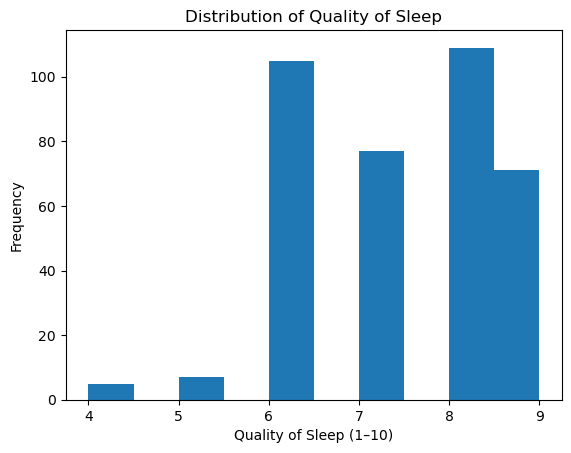

In [49]:
plt.figure()
plt.hist(df["quality_of_sleep"], bins=10)
plt.xlabel("Quality of Sleep (1–10)")
plt.ylabel("Frequency")
plt.title("Distribution of Quality of Sleep")
plt.show()

4. Graph 4 — Correlation Heatmap (Numeric Variables)

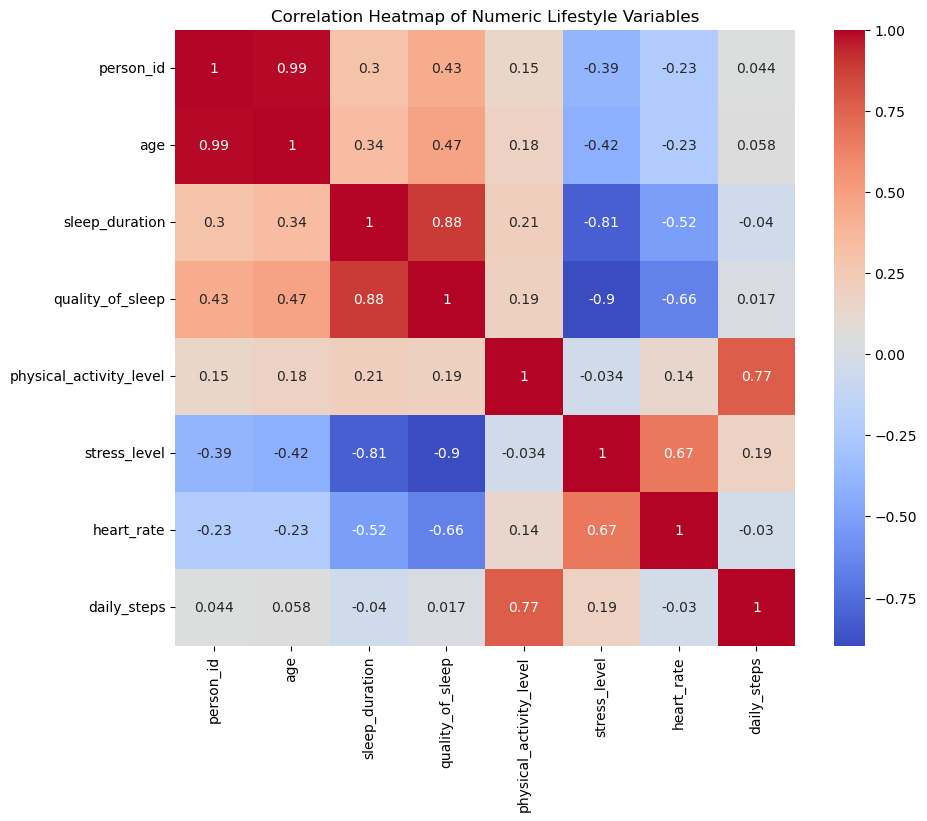

In [51]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Lifestyle Variables")
plt.show()

5. Graph 5 — Sleep Quality by Stress Level (Boxplot)

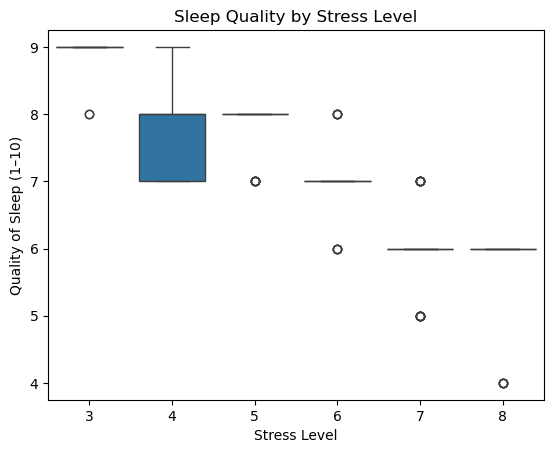

In [58]:
plt.figure()
sns.boxplot(x="stress_level", y="quality_of_sleep", data=df)
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep (1–10)")
plt.title("Sleep Quality by Stress Level")
plt.show()


### Key Insights from Correlation Analysis
- Sleep Duration is the Strongest Predictor of Sleep Quality (r = 0.88).
People who sleep longer hours tend to report much higher sleep quality, making sleep duration the single most important variable in the dataset. This suggests that increasing total sleep time should be a primary focus of any intervention aimed at improving sleep outcomes.

- Stress Level has a Very Strong Negative Impact on Sleep Quality (r = -0.90).
As stress levels increase, sleep quality drops sharply. This is the strongest negative relationship observed in the dataset, indicating that stress is a critical risk factor for poor sleep. Stress management strategies are therefore likely to have a substantial impact on improving sleep quality.

- Heart Rate is Moderately to Strongly Linked to Poor Sleep (r = -0.66).
Higher resting heart rates are associated with lower sleep quality. This may reflect physiological stress, inadequate recovery, or underlying health conditions that interfere with restorative sleep. Heart rate could serve as a useful physiological indicator for identifying users at risk of poor sleep.

- Physical Activity has only a Weak Direct Relationship with Sleep Quality (r = 0.19).
Exercise alone does not strongly predict better sleep quality in this dataset. While physical activity is generally associated with better health outcomes, its direct effect on sleep quality appears limited compared to sleep duration and stress. This suggests that exercise may play a more indirect, secondary role in improving sleep.

- Age has a Moderate Positive Relationship with Sleep Quality (r = 0.47).
Older participants tend to report better sleep quality. This pattern may reflect more consistent routines, reduced late-night screen use, or better sleep hygiene among older individuals. Younger users may therefore benefit from targeted interventions focused on routine-building and stress reduction.